# Exercise 2.3: Basic Image Processing and Analysis

## Objective: 

The objective of this exercise is to help beginners get familiar with NumPy, scipy, scikit-learn, and OpenCV while performing basic image processing and analysis tasks.

In [3]:
#read image

import cv2

# Load the image
image = cv2.imread('imgs_lab/sample_image.png')

Display image

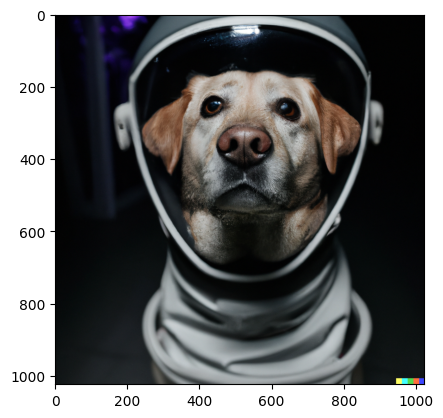

In [18]:
# Display the image
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Convert to grayscale

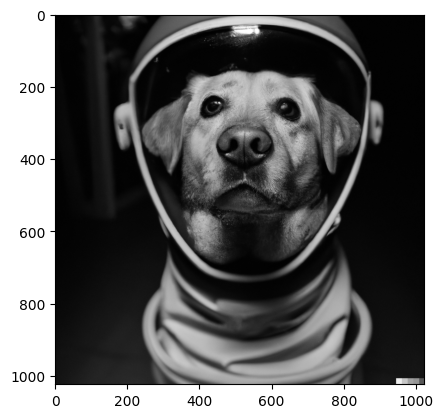

In [10]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

Apply an image enhancement technique, such as histogram equalization, to the grayscale image using OpenCV

https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html

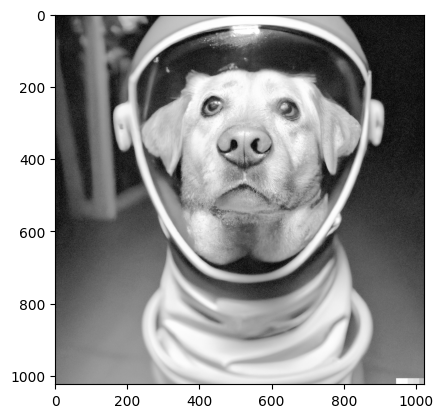

In [9]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))

Apply an edge detection algorithm, such as the Canny edge detector, to the enhanced image using OpenCV

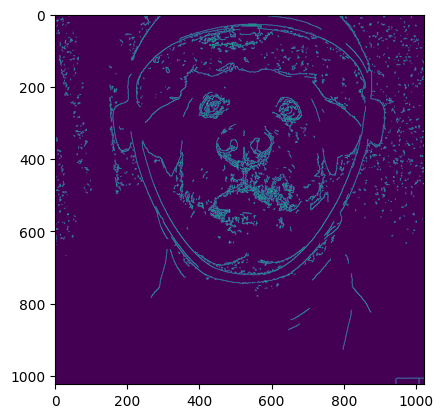

In [14]:
# Apply Canny edge detection
edges = cv2.Canny(equalized_image, 100, 200)
plt.imshow(edges)

Use NumPy or scikit-learn to extract basic features from the image, such as the number of edges, image dimensions, or average pixel intensity.

In [15]:
import numpy as np

# Extract the number of edges using NumPy
num_edges = np.sum(edges) / 255  # Assuming edges are binary (0 or 255)

# Calculate average pixel intensity
average_intensity = np.mean(equalized_image)

# Print the results
print(f"Average Pixel Intensity: {average_intensity}")
print(f"Number of Edges: {num_edges}")

Average Pixel Intensity: 129.73141384124756
Number of Edges: 29299.0


## The Extra-Mile! 

Using the image rocky.jpg generate rocky_chess_pattern.png

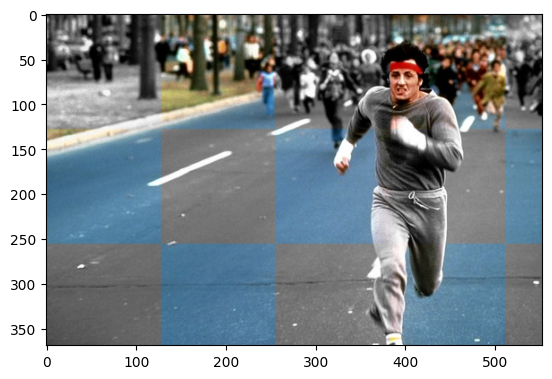

In [17]:
import cv2
import numpy as np

def split_into_chessboard_patches(image_path, patch_size):
    # Read the input image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image not found.")
        return
    
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get the dimensions of the image
    height, width, channel = image.shape
    
    # Create an empty canvas to place the patches
    canvas = np.zeros_like(image)
    
    # Define colors for the chessboard pattern
    white = 255
    black = 0
    
    # Iterate through the image and create the chessboard pattern
    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            patch_color = white if (i // patch_size + j // patch_size) % 2 == 0 else black
            if patch_color == black:
                canvas[i:i+patch_size, j:j+patch_size,:] = image[i:i+patch_size, j:j+patch_size]
            else:
                canvas[i:i+patch_size, j:j+patch_size,:] = np.repeat(grayscale_image[i:i+patch_size, j:j+patch_size, None], repeats=3, axis=-1)
            #canvas[i:i+patch_size, j:j+patch_size] = patch_color
    
    # Apply the chessboard pattern to the grayscale image
    #output_image = grayscale_image & canvas
    
    return canvas 

image_path = 'imgs_lab/rocky.jpg'  # Replace with the path to your input image
patch_size = 128  # Adjust the patch size as needed

output_image = split_into_chessboard_patches(image_path, patch_size)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))